# 图像形态学处理

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [43]:
src = cv2.imread('../datas/char.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

In [44]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

## 1.膨胀图像    

In [45]:
#膨胀图像    
eroded = cv2.erode(gray,element) 

Text(0.5,1,'Eroded')

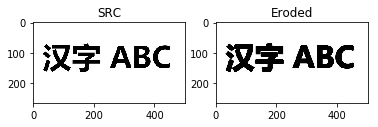

In [46]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(eroded,'gray')
plt.title('Eroded')

## 2.腐蚀图像 

In [47]:
#腐蚀图像 
dilated = cv2.dilate(gray,element)

Text(0.5,1,'Dilated')

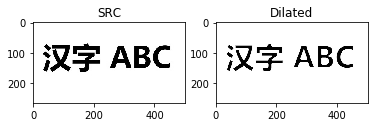

In [48]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dilated,'gray')
plt.title('Dilated')

## 3.闭运算 

In [49]:
 closed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, element)

Text(0.5,1,'Closed')

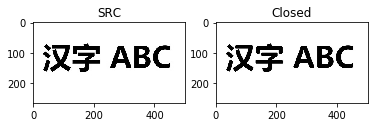

In [50]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(closed,'gray')
plt.title('Closed')

## 4.开运算

In [51]:
    opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, element) 

Text(0.5,1,'Opened')

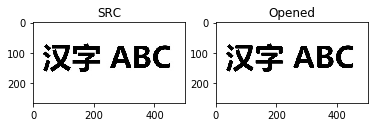

In [52]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(closed,'gray')
plt.title('Opened')

## 5.图像梯度

In [57]:
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, element) 

Text(0.5,1,'Gradient')

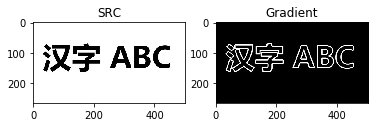

In [58]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(gradient,'gray')
plt.title('Gradient')

## 6.顶帽

In [60]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, element) 

Text(0.5,1,'TopHat')

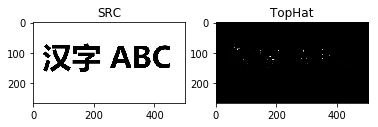

In [62]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(tophat,'gray')
plt.title('TopHat')

## 7.黑帽

In [63]:
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, element) 

Text(0.5,1,'BlackHat')

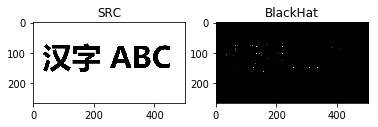

In [64]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(blackhat,'gray')
plt.title('BlackHat')

## 8.边缘检测

In [53]:
dilated = cv2.dilate(gray, element)    
eroded = cv2.erode(gray, element)    
    
#将两幅图像相减获得边，第一个参数是膨胀后的图像，第二个参数是腐蚀后的图像    
result = cv2.absdiff(dilated,eroded);    
    
#上面得到的结果是灰度图，将其二值化以便更清楚的观察结果    
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY);     
#反色，即对二值图每个像素取反    
result = cv2.bitwise_not(result); 

Text(0.5,1,'Edge Detect')

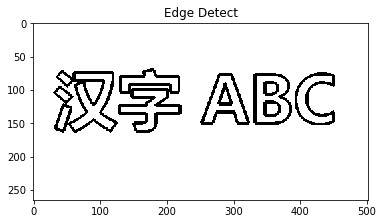

In [54]:
plt.imshow(result,'gray')
plt.title('Edge Detect')

## 9.角点检测

In [55]:
#构造5×5的结构元素，分别为十字形、菱形、方形和X型    
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))    
#菱形结构元素的定义稍麻烦一些    
diamond = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5)) 
square = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))    
x = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))    
#使用cross膨胀图像    
result1 = cv2.dilate(gray,cross) 
#使用菱形腐蚀图像    
result1 = cv2.erode(result1, diamond)    
    
#使用X膨胀原图像     
result2 = cv2.dilate(gray, x)    
#使用方形腐蚀图像     
result2 = cv2.erode(result2,square)    
    
#result = result1.copy()    
#将两幅闭运算的图像相减获得角     
result = cv2.absdiff(result2, result1)
#使用阈值获得二值图    
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY)
for j in range(result.size):    
    y = int(j // result.shape[0])
    x = int(j % result.shape[0])
    if result[x, y] == 255:    
        cv2.circle(src, (y, x), 5, (255,0,0))  

133030


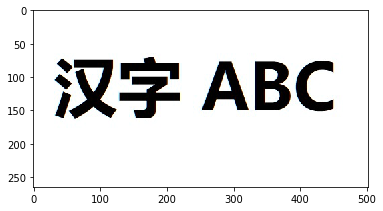

In [56]:
plt.imshow(src)